In [ ]:
%pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 35.6 MB/s eta 0:00:00


In [ ]:
import parselmouth
import os
import csv

# Set the directory paths
input_directory = r"/Users/anshumansaikia/Documents/7th Sem/FSP/FSP Bodo vowels"
output_directory = r"/Users/anshumansaikia/Documents/7th Sem/FSP/FSP Bodo vowels/vowel CSV file"

# Get list of all files in the input directory
file_list = os.listdir(input_directory)

# Loop through the list of files
for file_name in file_list:
    if file_name.endswith(".wav"):
        # Construct the paths for the .wav and corresponding .textgrid files
        sound_file_path = os.path.join(input_directory, file_name)
        textgrid_file_path = os.path.join(input_directory, file_name.replace(".wav", ".textgrid"))

        # Load the sound and TextGrid objects
        sound = parselmouth.Sound(sound_file_path)
        tg = parselmouth.praat.call("Read from file", textgrid_file_path)

        # Get the number of intervals in the first tier (phoneme tier assumed)
        num_intervals = int(parselmouth.praat.call(tg, "Get number of intervals", 1))

        # Prepare the output CSV file path
        output_file_path = os.path.join(output_directory, file_name.replace(".wav", ".csv"))

        # Create the Formant object
        formant = sound.to_formant_burg(time_step=0.025, max_number_of_formants=5, maximum_formant=5000,
                                        window_length=0.025, pre_emphasis_from=50)

        # Open the output CSV file and write the header with utf-8 encoding
        with open(output_file_path, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(["time", "phoneme", "F1", "F2", "F3"])

            # Loop through each interval (phoneme)
            for interval_index in range(1, num_intervals + 1):
                # Get the phoneme label
                phoneme = parselmouth.praat.call(tg, "Get label of interval", 1, interval_index)

                # Get the start and end times of the interval
                start_time = parselmouth.praat.call(tg, "Get start point", 1, interval_index)
                end_time = parselmouth.praat.call(tg, "Get end point", 1, interval_index)
                midpoint = (start_time + end_time) / 2

                # Extract the formant values (F1, F2, F3) at the midpoint
                f1 = formant.get_value_at_time(1, midpoint)
                f2 = formant.get_value_at_time(2, midpoint)
                f3 = formant.get_value_at_time(3, midpoint)

                # Write the data to the CSV file
                writer.writerow([midpoint, phoneme, f1, f2, f3])

        print(f"Processed file: {file_name} - Data saved to {output_file_path}")

print("All files processed successfully!")

Processed file: pri16_1.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri16_1.csv
Processed file: pri2_2.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri2_2.csv
Processed file: pri14_2.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri14_2.csv
Processed file: pri16_2.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri16_2.csv
Processed file: pri2_1.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri2_1.csv
Processed file: pri14_1.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri14_1.csv
Processed file: pri4_2.wav - Data saved to /Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Priyanka CSV file/pri4_2.csv
Processed file: pri10_1.wav - Data saved to /Users/rohanthapa/Documents/7th

In [ ]:
import os
import pandas as pd

# Specify the folder containing the CSV files
folder_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Speakers'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Check if CSV files were found
if not csv_files:
    print("No CSV files found in the specified directory.")
else:
    print(f"Found {len(csv_files)} CSV files: {csv_files}")

# Initialize an empty list to store dataframes
dataframes = []

# Read each CSV file and append it to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        dataframes.append(df)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any dataframes were successfully loaded
if not dataframes:
    print("No valid CSV files to merge.")
else:
    # Concatenate all dataframes into one
    merged_df = pd.concat(dataframes, ignore_index=True)
    # Save the merged dataframe to the same directory
    output_file_path = os.path.join(folder_path, 'merged_output.csv')
    merged_df.to_csv(output_file_path, index=False)
    print(f"All CSV files have been merged into '{output_file_path}'.")


Found 2 CSV files: ['female.csv', 'male.csv']
Successfully read: female.csv
Successfully read: male.csv
All CSV files have been merged into '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Speakers/merged_output.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# Read data from CSV file
file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Speakers/merged_output.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Set font to one that supports Hindi characters (Devanagari Sangam MN is a good choice)
matplotlib.rcParams['font.family'] = 'Devanagari Sangam MN'

# Ensure your CSV file has the columns: time, phoneme, F1, F2, F3
# Example structure: time, phoneme, F1, F2, F3

# Get the unique phonemes from the 'phoneme' column
unique_phonemes = df['phoneme'].unique()

# Create a color map (using the 'tab10' colormap here, which supports up to 10 unique colors)
color_map = cm.get_cmap('tab10', len(unique_phonemes))

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Loop through each unique phoneme and plot corresponding F2 vs F1
for i, phoneme in enumerate(unique_phonemes):
    subset = df[df['phoneme'] == phoneme]
    # Automatically assign a color from the color map based on the phoneme index
    plt.scatter(
        subset['F2'],  # x-axis (F2)
        subset['F1'],  # y-axis (F1)
        label=phoneme,
        s=20,# Label for the phoneme
        color=color_map(i)  # Get color from the colormap
    )

# Add labels, title, and legend
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('F2 vs. F1 for Different Phonemes')
plt.legend(title="Phonemes")
plt.grid(True)

# Invert the y-axis (F1) and x-axis (F2) if decreasing scaling is desired
plt.gca().invert_yaxis()  # Decreasing scaling for F1 (y-axis)
plt.gca().invert_xaxis()  # Decreasing scaling for F2 (x-axis) (Optional)

# Show plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Speakers/merged_output.csv'

/var/folders/t0/cx37dm0x3vndng25zn_9pk_r0000gn/T/ipykernel_15533/3809231842.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(unique_phonemes))


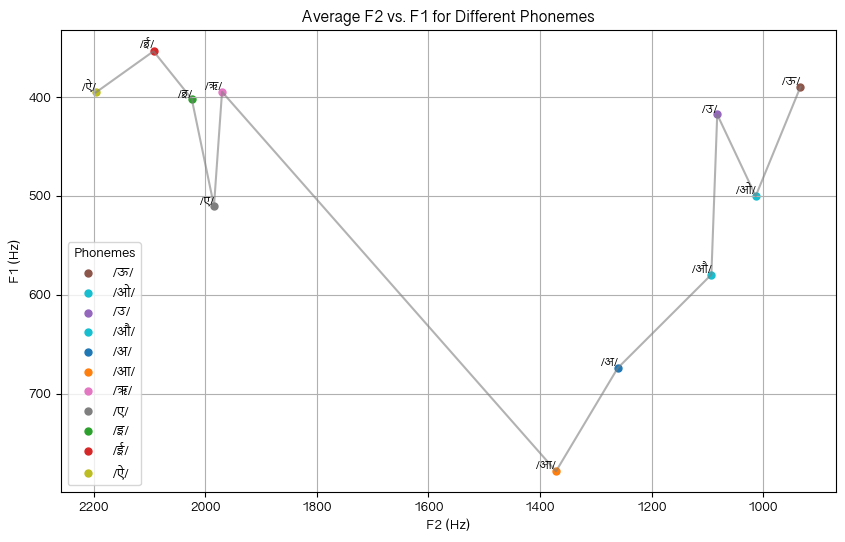

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# Read data from CSV file
file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/Speakers/merged_output.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Set font to one that supports Hindi characters (Devanagari Sangam MN is a good choice)
matplotlib.rcParams['font.family'] = 'Devanagari Sangam MN'

# Ensure your CSV file has the columns: time, phoneme, F1, F2, F3
# Example structure: time, phoneme, F1, F2, F3

# Group data by 'phoneme' and calculate the mean for F1 and F2
average_values = df.groupby('phoneme')[['F1', 'F2']].mean().reset_index()

# Get the unique phonemes from the 'phoneme' column
unique_phonemes = average_values['phoneme'].unique()

# Create a color map (using the 'tab10' colormap here, which supports up to 10 unique colors)
color_map = cm.get_cmap('tab10', len(unique_phonemes))

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Sort data by F2 (or another logical axis) for a logical connection order
average_values = average_values.sort_values(by='F2')

# Extract F2 and F1 for plotting lines
f2_values = average_values['F2']
f1_values = average_values['F1']

# Plot the line connecting points
plt.plot(f2_values, f1_values, linestyle='-', color='grey', alpha=0.6)  # Add a connecting line

# Plot the averages for each phoneme
for i, row in average_values.iterrows():
    phoneme = row['phoneme']
    f2 = row['F2']
    f1 = row['F1']
    # Automatically assign a color from the color map based on the phoneme index
    plt.scatter(
        f2,  # x-axis (F2)
        f1,  # y-axis (F1)
        color=color_map(i),  # Get color from the colormap
        s=25,  # Set marker size
        label=phoneme  # Label for the legend
    )
    # Annotate the point with the phoneme label
    plt.text(f2, f1, phoneme, fontsize=9, ha='right', va='bottom')  # Adjust position as needed

# Add labels, title, and legend
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Average F2 vs. F1 for Different Phonemes')
plt.legend(title="Phonemes")
plt.grid(True)

# Invert the y-axis (F1) and x-axis (F2) if decreasing scaling is desired
plt.gca().invert_yaxis()  # Decreasing scaling for F1 (y-axis)
plt.gca().invert_xaxis()  # Decreasing scaling for F2 (x-axis) (Optional)

# Show plot
plt.show()


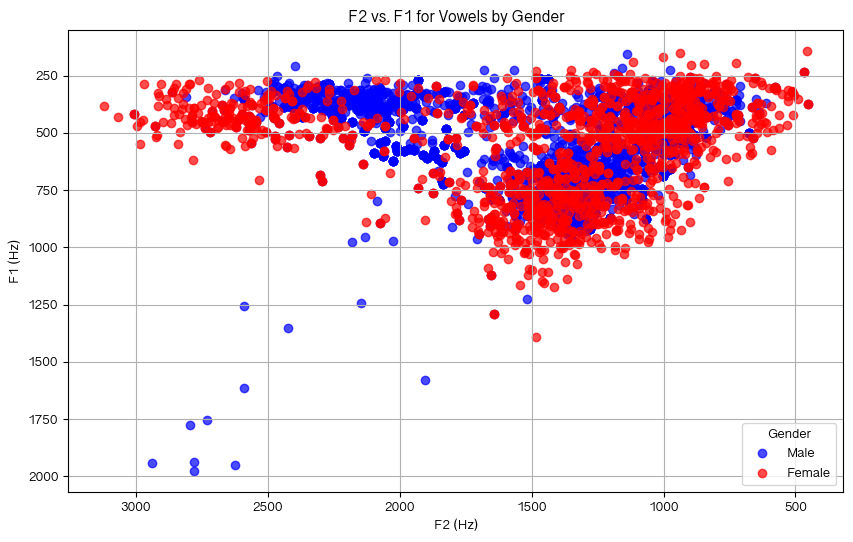

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# Set font to support Hindi characters (Devanagari Sangam MN is a good choice)
matplotlib.rcParams['font.family'] = 'Devanagari Sangam MN'

# File paths for male and female data
male_file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/male.csv'  # Replace with actual path
female_file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/female.csv'  # Replace with actual path

# Read the male and female data
male_data = pd.read_csv(male_file_path)
female_data = pd.read_csv(female_file_path)

# Ensure your CSV files have the columns: time, phoneme, F1, F2, F3
# Example structure: time, phoneme, F1, F2, F3

# Add a 'Gender' column to differentiate the data
male_data['Gender'] = 'Male'
female_data['Gender'] = 'Female'

# Combine the male and female data
combined_data = pd.concat([male_data, female_data], ignore_index=True)

# Create a color map for gender
color_map = {'Male': 'blue', 'Female': 'red'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot male data
plt.scatter(
    male_data['F2'],  # x-axis (F2)
    male_data['F1'],  # y-axis (F1)
    label='Male',  # Legend label
    color=color_map['Male'],  # Color for male
    alpha=0.7  # Transparency
)

# Plot female data
plt.scatter(
    female_data['F2'],  # x-axis (F2)
    female_data['F1'],  # y-axis (F1)
    label='Female',  # Legend label
    color=color_map['Female'],  # Color for female
    alpha=0.7  # Transparency
)

# Add labels, title, and legend
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('F2 vs. F1 for Vowels by Gender')
plt.legend(title="Gender")
plt.grid(True)

# Invert the y-axis (F1) and x-axis (F2) for decreasing scaling
plt.gca().invert_yaxis()  # Invert F1 (y-axis)
plt.gca().invert_xaxis()  # Invert F2 (x-axis) (Optional)

# Show plot
plt.show()


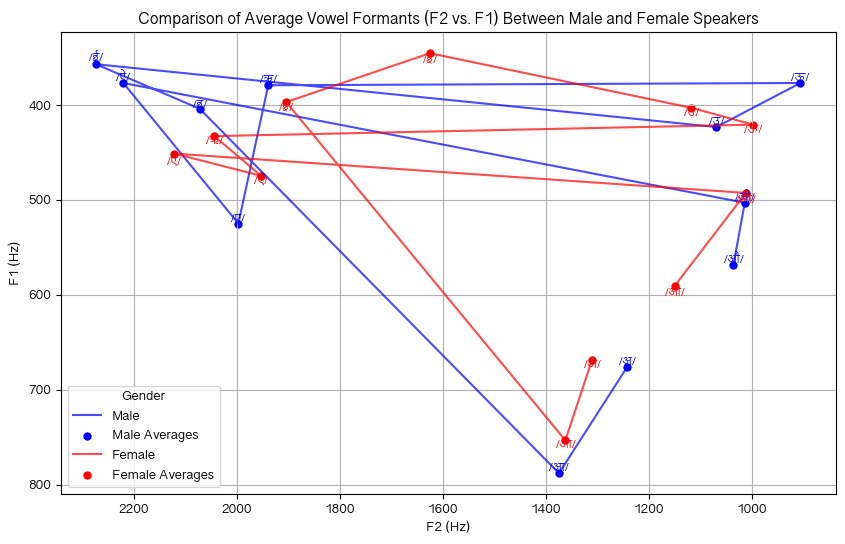

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set font to support Hindi characters (Devanagari Sangam MN is a good choice)
matplotlib.rcParams['font.family'] = 'Devanagari Sangam MN'

# File paths for male and female data
male_file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/male.csv'  # Replace with actual path
female_file_path = '/Users/rohanthapa/Documents/7th Sem/FSP/Nepali Speech Data/female.csv'  # Replace with actual path

# Read the male and female data
male_data = pd.read_csv(male_file_path)
female_data = pd.read_csv(female_file_path)

# Group data by 'phoneme' and calculate the mean for F1 and F2 (across all male and female speakers)
male_avg = male_data.groupby('phoneme')[['F1', 'F2']].mean().reset_index()
female_avg = female_data.groupby('phoneme')[['F1', 'F2']].mean().reset_index()

# Ensure both datasets have the same phoneme order
male_avg = male_avg.sort_values(by='phoneme')
female_avg = female_avg.sort_values(by='phoneme')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot male averages (curve for male data)
plt.plot(
    male_avg['F2'], male_avg['F1'],
    linestyle='-', color='blue', alpha=0.7, label='Male'
)
plt.scatter(
    male_avg['F2'], male_avg['F1'],
    color='blue', label='Male Averages', s=25
)

# Annotate each vowel for male
for i, row in male_avg.iterrows():
    plt.text(row['F2'], row['F1'], row['phoneme'], fontsize=9, ha='center', va='bottom', color='blue')

# Plot female averages (curve for female data)
plt.plot(
    female_avg['F2'], female_avg['F1'],
    linestyle='-', color='red', alpha=0.7, label='Female'
)
plt.scatter(
    female_avg['F2'], female_avg['F1'],
    color='red', label='Female Averages', s=25
)

# Annotate each vowel for female
for i, row in female_avg.iterrows():
    plt.text(row['F2'], row['F1'], row['phoneme'], fontsize=9, ha='center', va='top', color='red')

# Add labels, title, and legend
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Comparison of Average Vowel Formants (F2 vs. F1) Between Male and Female Speakers')
plt.legend(title="Gender")
plt.grid(True)

# Invert axes for proper vowel space representation
plt.gca().invert_yaxis()  # Invert F1 (y-axis)
plt.gca().invert_xaxis()  # Invert F2 (x-axis)

# Show the plot
plt.show()
